# [聚类算法](https://blog.csdn.net/loveliuzz/article/details/78783773)
* 聚类分析是没有给定划分类别的情况下，根据样本相似度进行样本分组的一种方法，是一种非监督的学习算法。
![](img/1.png)


## 相似度计算
* 聚类首先要解决的是解决两个集合的的相似程度的问题。我们使用一个distance（v1,v2）来表示两个集合的相似程度，distance越小越相似v1，v2是两个向量，如果有非数值的参数可以想办法将它量化
![](img/2.png)
![](img/3.png)
![](img/4.png)

## 聚类的思想
![](img/5.png)


## [聚类算法的种类](http://www.elecfans.com/dianzichangshi/20171025570086.html)
![](img/6.jpg)

## 两种主要算法
* K-Means算法
* DBSCAN算法

# K-Means算法

## K-Means算法思想
![](img/6.png)

## K-Means算法过程
![](img/7.png)

## K-Means算法实例

In [2]:
# beer dataset
import pandas as pd
beer = pd.read_csv('data/data.txt', sep=' ')

In [3]:
beer.head(3)

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48


In [4]:
X = beer[["calories","sodium","alcohol","cost"]]#只取这几个变量

In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(n_clusters=3).fit(X)#分三类
km2 = KMeans(n_clusters=2).fit(X)#分两类

In [11]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1])

In [12]:
beer['cluster'] = km.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
0,Budweiser,144,15,4.7,0.43,0,0
1,Schlitz,151,19,4.9,0.43,0,0
2,Lowenbrau,157,15,0.9,0.48,0,0
3,Kronenbourg,170,7,5.2,0.73,0,0
4,Heineken,152,11,5.0,0.77,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0
6,Augsberger,175,24,5.5,0.40,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0
16,Hamms,139,19,4.4,0.43,0,0


In [28]:
from pandas.plotting import scatter_matrix

In [14]:
cluster_centers = km.cluster_centers_

cluster_centers_2 = km2.cluster_centers_

In [17]:
beer.groupby("cluster").mean()#求不同类别的平均数

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,150.00,17.0,4.521429,0.520714,0
1,102.75,10.0,4.075000,0.440000,1
2,70.00,10.5,2.600000,0.420000,1


In [18]:
beer.groupby("cluster2").mean()

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,150.000000,17.000000,4.521429,0.520714,0.000000
1,91.833333,10.166667,3.583333,0.433333,1.333333


In [19]:
centers = beer.groupby("cluster").mean().reset_index()

In [20]:
centers

,cluster,calories,sodium,alcohol,cost,cluster2
0,0,150.00,17.0,4.521429,0.520714,0
1,1,102.75,10.0,4.075000,0.440000,1
2,2,70.00,10.5,2.600000,0.420000,1


In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
plt.rcParams['font.size'] = 14
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0,0.5,'Alcohol')

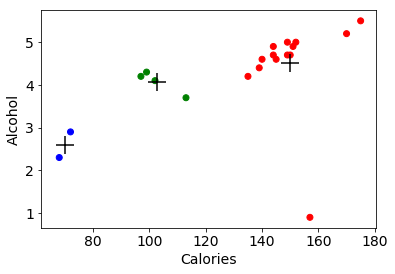

In [26]:
plt.scatter(beer["calories"], beer["alcohol"],c=colors[beer["cluster"]])

plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

plt.xlabel("Calories")
plt.ylabel("Alcohol")

Text(0.5,0.98,'With 3 centroids initialized')

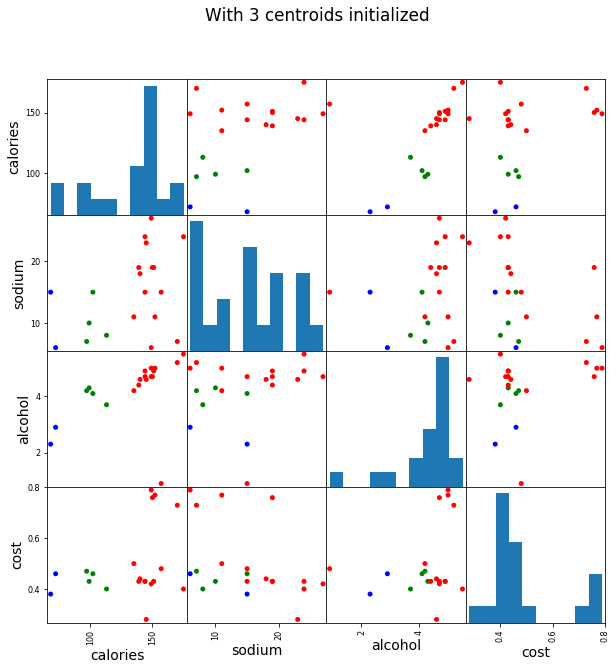

In [29]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster"]], figsize=(10,10))
plt.suptitle("With 3 centroids initialized")

Text(0.5,0.98,'With 2 centroids initialized')

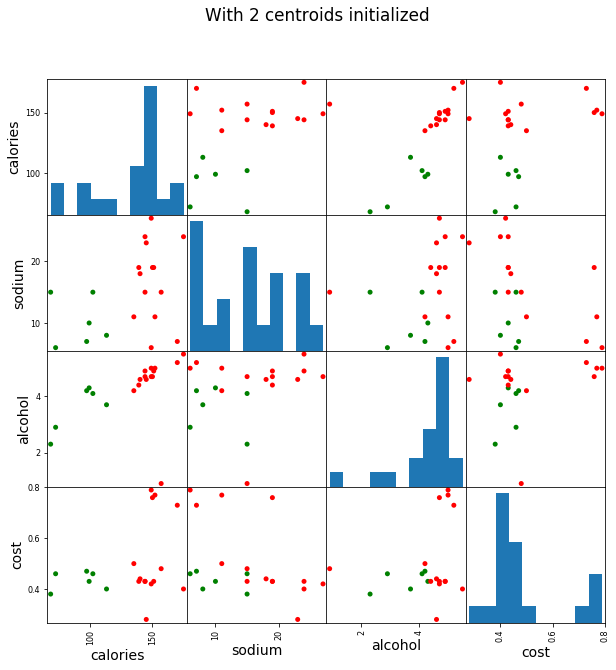

In [30]:
scatter_matrix(beer[["calories","sodium","alcohol","cost"]],s=100, alpha=1, c=colors[beer["cluster2"]], figsize=(10,10))
plt.suptitle("With 2 centroids initialized")

## Scaled data

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
km = KMeans(n_clusters=3).fit(X_scaled)

In [35]:
beer["scaled_cluster"] = km.labels_
beer.sort_values("scaled_cluster")

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
14,Kirin,149,6,5.0,0.79,0,0,0
3,Kronenbourg,170,7,5.2,0.73,0,0,0
4,Heineken,152,11,5.0,0.77,0,0,0
13,Becks,150,19,4.7,0.76,0,0,0
9,Budweiser_Light,113,8,3.7,0.40,1,1,1
15,Pabst_Extra_Light,68,15,2.3,0.38,2,1,1
12,Michelob_Light,135,11,4.2,0.50,0,0,1
11,Coors_Light,102,15,4.1,0.46,1,1,1
18,Olympia_Goled_Light,72,6,2.9,0.46,2,1,1
19,Schlitz_Light,97,7,4.2,0.47,1,1,1


In [36]:
beer.groupby("scaled_cluster").mean()

,calories,sodium,alcohol,cost,cluster,cluster2
scaled_cluster,,,,,,
0,155.250,10.750,4.9750,0.7625,0.0,0.00
1,105.375,10.875,3.3250,0.4475,1.0,0.75
2,148.375,21.125,4.7875,0.4075,0.0,0.00


Text(0.5,0.98,'With Scaled data centroids initialized')

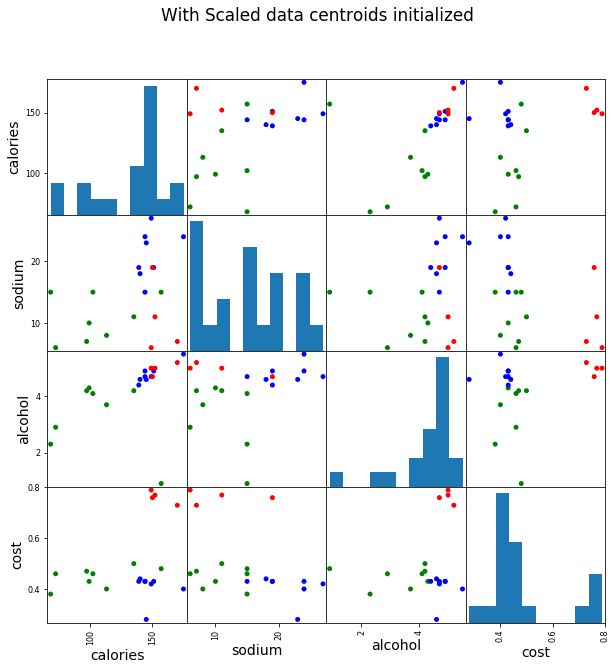

In [38]:
scatter_matrix(X, c=colors[beer.scaled_cluster], alpha=1, figsize=(10,10), s=100)
plt.suptitle("With Scaled data centroids initialized")

# DBSCAN
* DBSCAN是一种基于密度的聚类算法，这类密度聚类算法一般假定类别可以通过样本分布的紧密程度决定。同一类别的样本，他们之间的紧密相连的，也就是说，在该类别任意样本周围不远处一定有同类别的样本存在。

## DBSCAN算法流程
![](img/8.PNG)

## DBSCAN实例

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
db = DBSCAN(eps=10, min_samples=2).fit(X)
#eps:The maximum distance between two samples for them to be considered,
#min_samples:The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. 

In [42]:
labels = db.labels_

In [43]:
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster,cluster_db
9,Budweiser_Light,113,8,3.7,0.40,1,1,1,-1
3,Kronenbourg,170,7,5.2,0.73,0,0,0,-1
6,Augsberger,175,24,5.5,0.40,0,0,2,-1
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0,2,0
16,Hamms,139,19,4.4,0.43,0,0,2,0
14,Kirin,149,6,5.0,0.79,0,0,0,0
13,Becks,150,19,4.7,0.76,0,0,0,0
12,Michelob_Light,135,11,4.2,0.50,0,0,1,0
10,Coors,140,18,4.6,0.44,0,0,2,0
0,Budweiser,144,15,4.7,0.43,0,0,2,0


In [45]:
beer.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
cluster_db,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.333333,0.333333,1.000000
0,146.250000,17.250000,4.383333,0.513333,0.000000,0.000000,1.333333
1,99.333333,10.666667,4.200000,0.453333,1.000000,1.000000,1.000000
2,70.000000,10.500000,2.600000,0.420000,2.000000,1.000000,1.000000


Text(0.5,0.98,'DBSCAN')

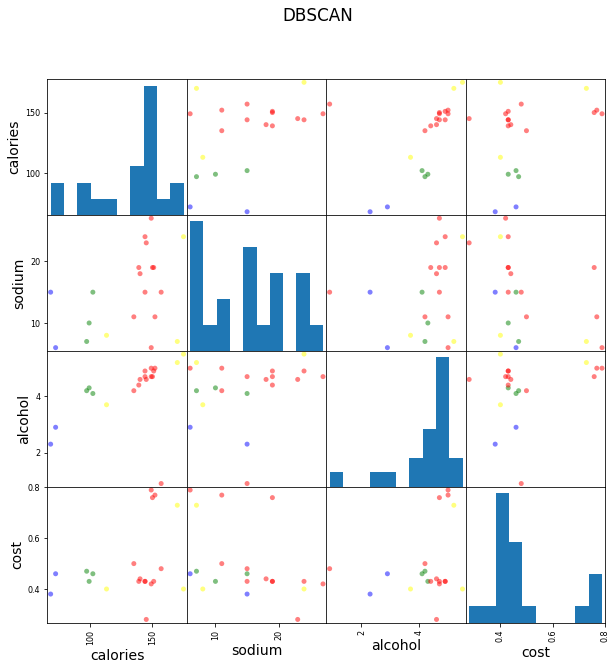

In [48]:
scatter_matrix(X, c=colors[beer.cluster_db], figsize=(10,10), s=100)
plt.suptitle('DBSCAN')